# STEP1: Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load and Preprocess the Dataset

In [2]:
# Load the dataset
dataset = pd.read_csv('shopping_behavior_updated.csv')

# Mapping frequency values to numerical equivalents
frequency_mapping = {
    'Weekly': 52,
    'Monthly': 12,
    'Fortnightly': 26,
    'Bi-Weekly': 26,
    'Annually': 1,
    'Quarterly': 4,
    'Every 3 Months': 4
}

# Apply the mapping to the column
dataset['Frequency of Purchases'] = dataset['Frequency of Purchases'].map(frequency_mapping)


# Step 3: Feature Selection for Clustering

In [3]:
# Select features for clustering
clustering_features = dataset[['Purchase Amount (USD)', 'Frequency of Purchases']]

# Scale the features for clustering
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_features_scaled)

# Add cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

print("Clustering completed! Cluster labels added to the dataset.")


Clustering completed! Cluster labels added to the dataset.


# Step 4: Visualization - Clustering Results

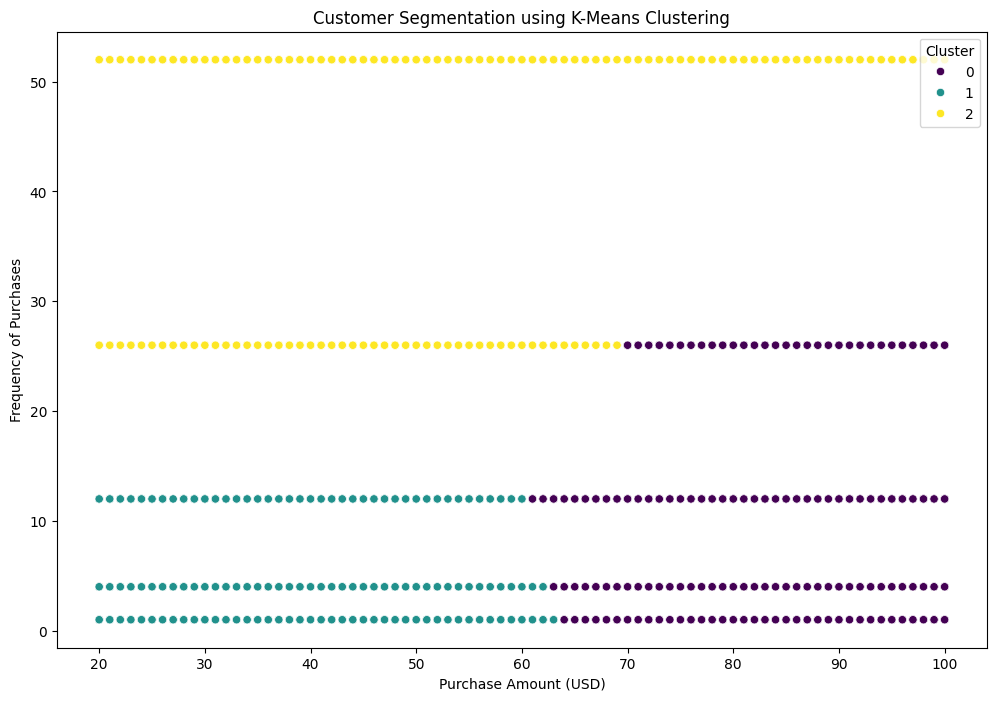

In [4]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Purchase Amount (USD)', y='Frequency of Purchases', hue='Cluster', palette='viridis', data=dataset)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency of Purchases')
plt.show()


# Step 5: Regression Models

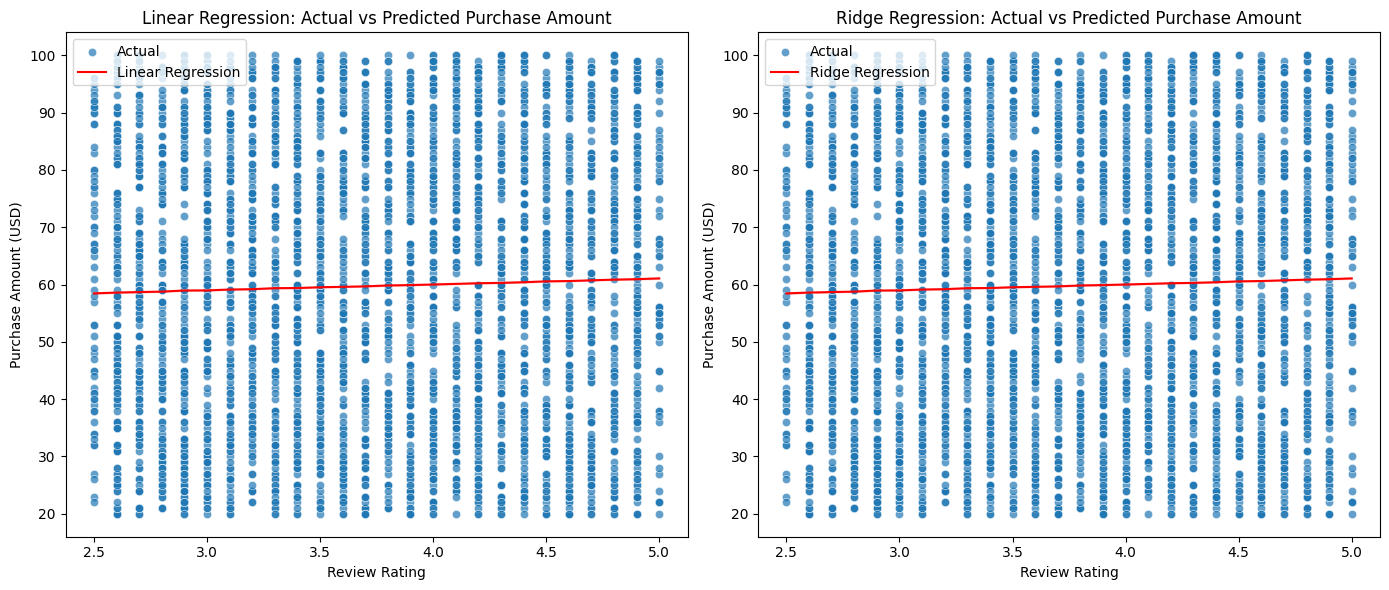

In [5]:
# Select features for regression
X_regression = dataset[['Frequency of Purchases', 'Review Rating']]
y_regression = dataset['Purchase Amount (USD)']

# Train a linear regression model
lin_regressor = LinearRegression()
lin_regressor.fit(X_regression, y_regression)

# Predictions
y_pred_lin = lin_regressor.predict(X_regression)

# Train a ridge regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_regression, y_regression)

# Predictions
y_pred_ridge = ridge_regressor.predict(X_regression)

# Visualization - Regression Results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=dataset['Review Rating'], y=y_regression, label='Actual', alpha=0.7)
sns.lineplot(x=dataset['Review Rating'], y=y_pred_lin, color='red', label='Linear Regression')
plt.title('Linear Regression: Actual vs Predicted Purchase Amount')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=dataset['Review Rating'], y=y_regression, label='Actual', alpha=0.7)
sns.lineplot(x=dataset['Review Rating'], y=y_pred_ridge, color='red', label='Ridge Regression')
plt.title('Ridge Regression: Actual vs Predicted Purchase Amount')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')

plt.tight_layout()
plt.show()


# Step 6: Classification Models

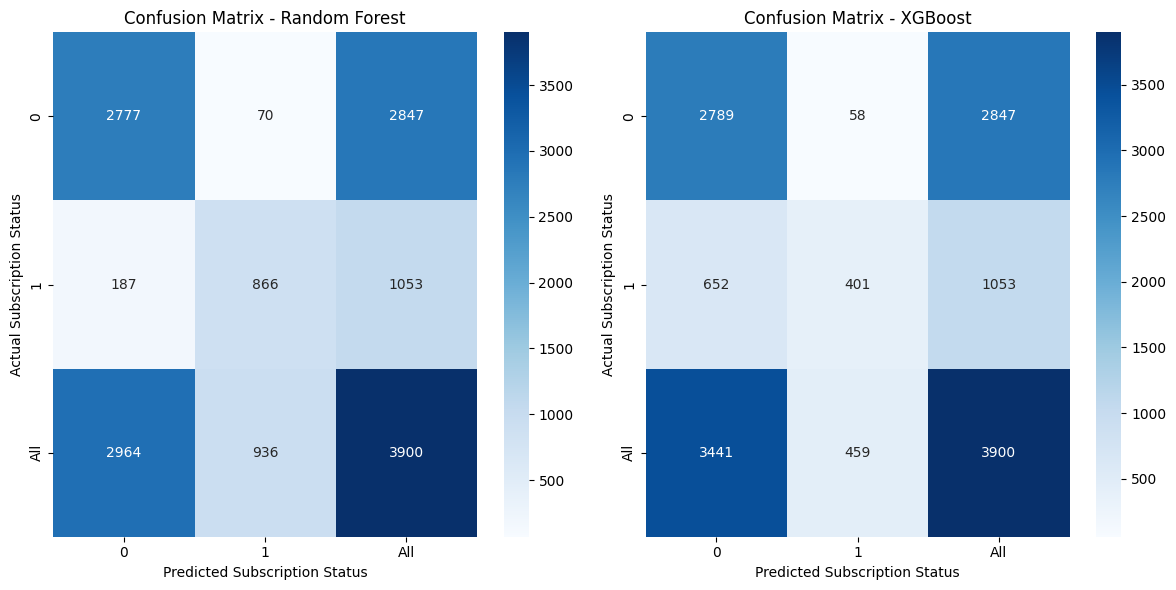

In [7]:
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_classification = le.fit_transform(dataset['Subscription Status'])

# Select features for classification
X_classification = dataset[['Frequency of Purchases', 'Review Rating', 'Purchase Amount (USD)']]

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_classification, y_classification)

# Predictions
y_pred_rf = rf_classifier.predict(X_classification)

# Train an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_classification, y_classification)

# Predictions
y_pred_xgb = xgb_classifier.predict(X_classification)

# Visualization - Classification Results
plt.figure(figsize=(12, 6))

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 1)
rf_cm = pd.crosstab(y_classification, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Subscription Status')
plt.ylabel('Actual Subscription Status')

# Confusion Matrix for XGBoost
plt.subplot(1, 2, 2)
xgb_cm = pd.crosstab(y_classification, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'], margins=True)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Subscription Status')
plt.ylabel('Actual Subscription Status')

plt.tight_layout()
plt.show()
